In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn import preprocessing
from scipy.io import loadmat
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read lfp data
data = loadmat('../data/F141020-lfp-5min-1kHz.mat')

# Extract pre_pmcao
Z_pre = data['pre_pmcao']

# Remove bad channels
bad_channels = np.array([5, 8, 9, 12, 16, 26])
Z_pre = np.delete(Z_pre, bad_channels, axis=1)

In [4]:
Z_pre.shape

(300000, 26)

In [5]:
# Standardize Z_pre to 0 mean and unit standard dev
num_epochs = 300
rate = 1000
for i in range(num_epochs):
    ioffset = i * rate
    preprocessing.scale(Z_pre[ioffset:ioffset+rate,], copy=False)

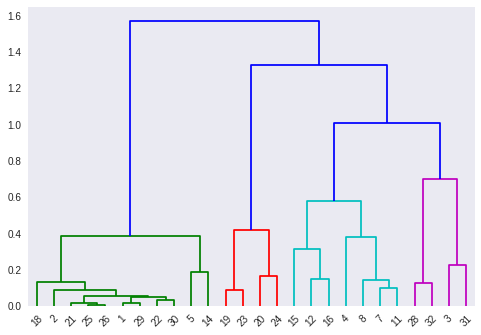

In [6]:
fig, ax = plt.subplots()
ax.grid(False)
i = 0  # epoch 1
ioffset = i * rate  # offset for sampling rate (1000 pts per epoch)
Z_clust = linkage(Z_pre[ioffset:ioffset+rate,].T, 'complete', 'correlation')  # Agglomerative clustering w/ complete linkage
labels = [i for i in range(1, 33) if i not in bad_channels+1]  # Create labels for channels 1-32 (excluding bad channels)
dend = dendrogram(Z_clust, color_threshold=1, labels=labels)  # Create dendogram

In [7]:
y = [1, 2, 3, 4] * 8
x = [1]*4 + [2]*4 + [3]*4 + [4]*4 + [5]*4 + [6]*4 + [7]*4 + [8]*4
#ch_labels = [j for i in range(1, 9) for j in range(i*4, 4*(i-1), -1)]
ch_labels = [i for i in range(1, 33)]

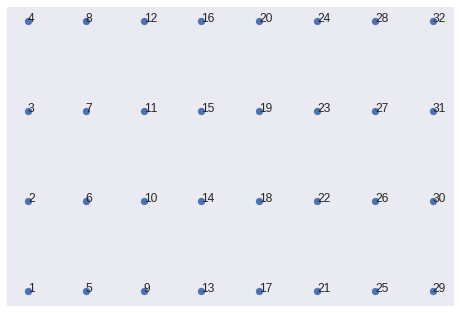

In [8]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(x, y)

for i, txt in enumerate(ch_labels):
    ax.annotate(txt, (x[i],y[i]))

In [9]:
k = 4
clusters = fcluster(Z_clust, k, criterion='maxclust')
clusters

array([1, 1, 4, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 4, 1,
       1, 4, 4], dtype=int32)

In [10]:
# TODO: Refactor!
clusters2 = np.zeros(32)
j = 0
for i in range(32):
    if i not in bad_channels:
        clusters2[i] = clusters[j]
        j += 1

In [11]:
clusters2

array([ 1.,  1.,  4.,  3.,  1.,  0.,  3.,  3.,  0.,  0.,  3.,  3.,  0.,
        1.,  3.,  3.,  0.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,  1.,
        0.,  4.,  1.,  1.,  4.,  4.])

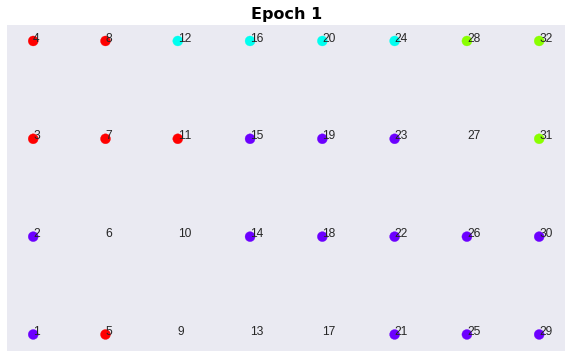

In [19]:
title_font = {'fontname':'DejaVu Sans', 'size':'16', 'color':'black', 'weight':'bold'}

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

cmap = plt.cm.hsv_r
ss = [x*100 if x == 0  else 100 for x in clusters2 ]
ax.scatter(x, y, c=clusters2, s=ss, cmap=cmap)

for i, txt in enumerate(ch_labels):
    ax.annotate(txt, (x[i],y[i]))
ax.set_title('Epoch 1', **title_font)

In [13]:
my_clusters = []

num_epochs = 300
rate = 1000
for i in range(num_epochs):
    ioffset = i * rate
    Z_clust = linkage(Z_pre[ioffset:ioffset+rate,].T, 'complete', 'correlation')
    
    k = 4  # number of clusters
    clusters = fcluster(Z_clust, k, criterion='maxclust')
    
    clusters2 = np.zeros(32)
    j = 0
    for i in range(32):
        if i not in bad_channels:
            clusters2[i] = clusters[j]
            j += 1
    my_clusters += [clusters2]

In [20]:
# cmap = plt.cm.hsv_r
# ch_labels = [i for i in range(1, 33)]
# title_font = {'fontname':'DejaVu Sans', 'size':'16', 'color':'black', 'weight':'bold'}


# for i, cluster in enumerate(my_clusters):
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.grid(False)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     ss = [x*100 if x == 0  else 100 for x in clusters2 ]
#     ax.scatter(x, y, c=cluster, s=ss, cmap=cmap)

#     for j, txt in enumerate(ch_labels):
#         ax.annotate(txt, (x[j],y[j]))
     
#     title = 'Epoch {}'.format(i+1)
#     ax.set_title(title, **title_font)
#     ax.invert_yaxis()
    
#     fname = 'figs/pre/pre_cluster_epoch_{}.png'.format(i+1)
#     plt.savefig(fname, bbox_inches='tight')
#     plt.close()